# K-means clustering

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('./Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Choosing 'Annual Income (k$)' and 'Spending Score (1-100)' as x

In [3]:
x = data.iloc[:, [3,4]].values

In [4]:
x 

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Finding the optimal number of clusters using elbow method

In [5]:
wcss_list = []

In [6]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)

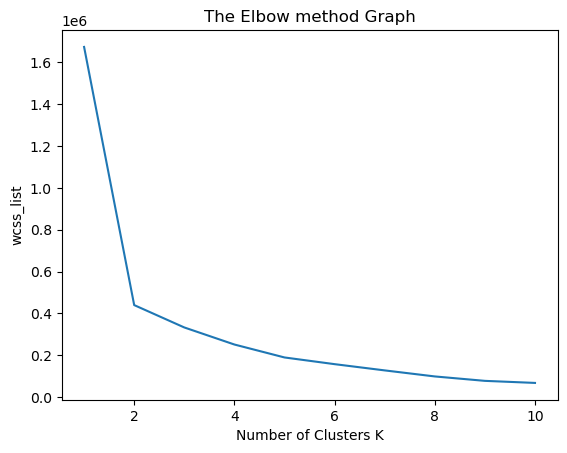

In [7]:
plt.plot(range(1,11), wcss_list)
plt.title('The Elbow method Graph')
plt.xlabel('Number of Clusters K')
plt.ylabel('wcss_list')
plt.show()

#### Training the k-means model on the dataset

In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(x)

#### Visualising the clusters

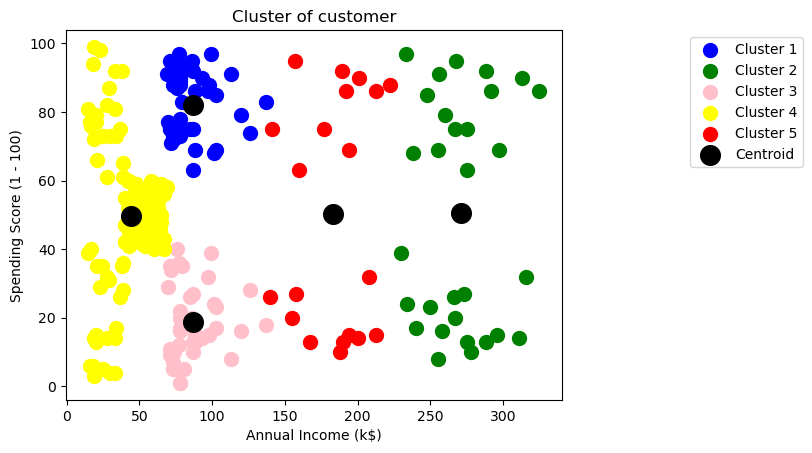

In [9]:
plt.scatter(x[y_pred == 0,0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_pred == 1,0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_pred == 2,0], x[y_pred == 2, 1], s = 100, c = 'pink', label = 'Cluster 3')
plt.scatter(x[y_pred == 3,0], x[y_pred == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(x[y_pred == 4,0], x[y_pred == 4, 1], s = 100, c = 'red', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroid')
plt.title('Cluster of customer')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend(bbox_to_anchor =(1.5, 1))
plt.show()